O algoritmo de **Regressão de Vetores de Suporte** é uma generalização de outro algoritmo, o da Máquina de Vetores de Suporte, estudado no capítulo anterior. É utilizado principalmente em problemas de classificação de dados, com uma diferença: o resultado não é um conjunto finito de dados classificados, mas uma função que gera valores contínuos.
Esse algoritmo se assemelha ao da regressão linear simples, do ponto de vista que ambos tentam prever uma variável contínua. Porém o SVR (usado em uma dimensão) tenta encontrar para essa função de aproximação um "tubo" onde os pontos estão agrupados. Esse "tubo" tem uma área "insensível" ao erro, definida por ε. Os pontos que se aproximam das bordas desse tubo são os potenciais vetores de suporte.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import numpy as np

dataset = pd.read_csv('/kaggle/input/tempo-x-salrio/tempo_salarios.csv')
X = dataset.iloc[:,0].values.reshape(-1, 1)
y = dataset.iloc[:,1].values.reshape(-1, 1)

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [2]:
# KERNEL Linear
regressor_linear = SVR(kernel='linear')

# KERNEL Gaussian Radial Basis Function
regressor_rbf = SVR(kernel='rbf')

___
## Regressor com o kernel Linear
___

In [3]:
regressor_linear.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

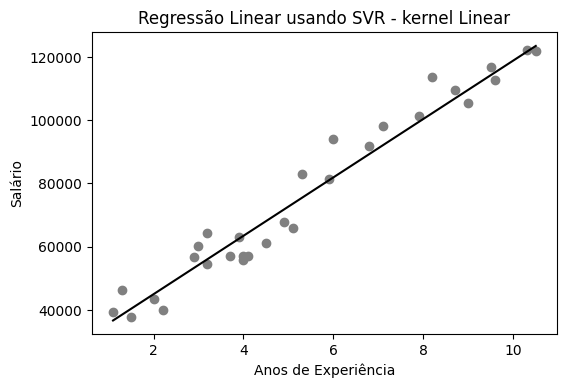

In [4]:
plt.figure(dpi = 100)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'gray')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor_linear.predict(X).reshape(-1, 1)), color = 'black')
plt.title('Regressão Linear usando SVR - kernel Linear')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.show()

___
## Regressor com o kernel RBF
___

In [5]:
regressor_rbf.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

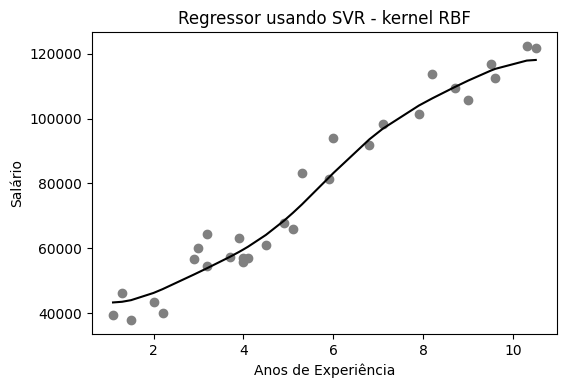

In [6]:
plt.figure(dpi = 100)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'gray')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor_rbf.predict(X).reshape(-1, 1)), color = 'black')
plt.title('Regressor usando SVR - kernel RBF')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.show()